A comparison between the initial behaviours of the original and the new implementation.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
from sympy import Expr

import slimpletic as st

Here we setup the parameters for the system.

In [3]:
m = 1.0
k = 1.0
ll = 1e-4 * np.sqrt(m * k)  # ll is $\lambda$ in the paper

Then the simulation parameters.

In [33]:
dt = 0.1 * np.sqrt(m / k)
t_sample_count = 10
tmax = t_sample_count * np.sqrt(m / k)
t0 = 0
t = t0 + dt * np.arange(0, t_sample_count + 1)

Now the system dynamics

In [9]:
def lagrangian_f(q, qdot, t):
    return 0.5 * m * jnp.dot(qdot, qdot) - 0.5 * k * jnp.dot(q, q) ** 2

In [10]:
from sympy import Symbol
from original import slimplectic

dho = slimplectic.GalerkinGaussLobatto('t', ['q'], ['v'])
L = 0.5 * m * np.dot(dho.v, dho.v) - 0.5 * k * np.dot(dho.q, dho.q)
# DHO:
K = -ll * np.dot(dho.vp, dho.qm)
# No damping:
K_nd = Symbol('a')
dho.discretize(L, K_nd, 0, method='implicit', verbose=False)

Now with some initial data

In [11]:
q0 = [1.]
pi0 = [0.25 * dt * k]

We get started integrating

In [34]:
st_results = st.iterate(
    lagrangian=lagrangian_f,
    q0=jnp.array(q0),
    pi0=jnp.array(pi0),
    dt=dt,
    t0=0,
    t_sample_count=t_sample_count,
    r=0
)

st_nr = np.vstack(
    [
        np.array(st_results[0]),
        np.array(st_results[1])
    ],
).T
st_nr

previous_q [1.]
previous_pi [0.025]
t_value 0.0
qi_values [[1.00624769]
 [0.99355908]]
previous_q [0.99355908]
previous_pi [-0.22496619]
t_value 0.1
qi_values [[0.99971088]
 [0.98721955]]
previous_q [0.98721955]
previous_pi [-0.22112795]
t_value 0.2
qi_values [[0.99327816]
 [0.98097846]]
previous_q [0.98097846]
previous_pi [-0.21739837]
t_value 0.30000000000000004
qi_values [[0.98694649]
 [0.97483301]]
previous_q [0.97483301]
previous_pi [-0.21377317]
t_value 0.4
qi_values [[0.98071297]
 [0.9687805 ]]
previous_q [0.9687805]
previous_pi [-0.21024827]
t_value 0.5
qi_values [[0.9745748 ]
 [0.96281832]]
previous_q [0.96281832]
previous_pi [-0.20681983]
t_value 0.6000000000000001
qi_values [[0.96852928]
 [0.956944  ]]
previous_q [0.956944]
previous_pi [-0.20348415]
t_value 0.7000000000000001
qi_values [[0.96257384]
 [0.95115513]]
previous_q [0.95115513]
previous_pi [-0.20023776]
t_value 0.8
qi_values [[0.956706 ]
 [0.9454494]]
previous_q [0.9454494]
previous_pi [-0.19707731]
t_value 0.9
qi_

array([[ 1.        ,  0.025     ],
       [ 0.99355908, -0.22496619],
       [ 0.98721955, -0.22112795],
       [ 0.98097846, -0.21739837],
       [ 0.97483301, -0.21377317],
       [ 0.9687805 , -0.21024827],
       [ 0.96281832, -0.20681983],
       [ 0.956944  , -0.20348415],
       [ 0.95115513, -0.20023776],
       [ 0.9454494 , -0.19707731],
       [ 0.93982459, -0.19399966]])

In [37]:
o_results = dho.integrate(q0, pi0, t)
o_nr = np.vstack(
    [
        np.array(o_results[0]),
        np.array(o_results[1])
    ],
).T
o_nr

array([[ 1.        ,  0.025     ],
       [ 0.9975    , -0.074875  ],
       [ 0.985025  , -0.17400125],
       [ 0.96269975, -0.27138749],
       [ 0.9307475 , -0.36605985],
       [ 0.88948778, -0.45707161],
       [ 0.83933318, -0.54351266],
       [ 0.78078525, -0.62451858],
       [ 0.71442946, -0.69927932],
       [ 0.64092938, -0.76704726],
       [ 0.56102001, -0.82714473]])

In [38]:
st_nr - o_nr

array([[ 0.        ,  0.        ],
       [-0.00394092, -0.15009119],
       [ 0.00219455, -0.0471267 ],
       [ 0.01827871,  0.05398912],
       [ 0.04408551,  0.15228668],
       [ 0.07929272,  0.24682334],
       [ 0.12348514,  0.33669283],
       [ 0.17615875,  0.42103443],
       [ 0.23672566,  0.49904156],
       [ 0.30452001,  0.56996995],
       [ 0.37880458,  0.63314507]])

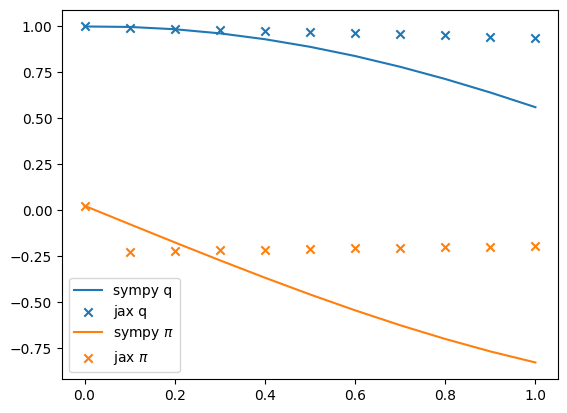

In [68]:
plt.plot(t, o_nr[:, 0], label='sympy q', color='C0')
plt.scatter(t, st_nr[:, 0], label='jax q', color='C0', marker='x')
plt.plot(t, o_nr[:, 1], label='sympy $\pi$', color='C1', )
plt.scatter(t, st_nr[:, 1], label='jax $\pi$', color='C1', marker='x')
plt.legend()